In [17]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data_path = '../data.csv'

In [19]:
# load the data to understand its structure
data = pd.read_csv(data_path)
data.head(), data.info(), data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

(         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
 0    842302         M        17.99         10.38          122.80     1001.0   
 1    842517         M        20.57         17.77          132.90     1326.0   
 2  84300903         M        19.69         21.25          130.00     1203.0   
 3  84348301         M        11.42         20.38           77.58      386.1   
 4  84358402         M        20.29         14.34          135.10     1297.0   
 
    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
 0          0.11840           0.27760          0.3001              0.14710   
 1          0.08474           0.07864          0.0869              0.07017   
 2          0.10960           0.15990          0.1974              0.12790   
 3          0.14250           0.28390          0.2414              0.10520   
 4          0.10030           0.13280          0.1980              0.10430   
 
    ...  texture_worst  perimeter_worst  area_wo

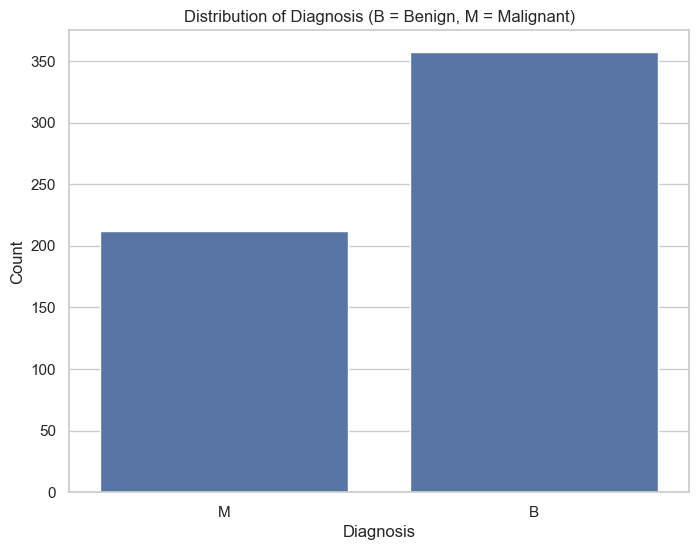

In [20]:
# set the aesthetic style of the plots
sns.set(style="whitegrid")

# distribution of Diagnosis
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='diagnosis', data=data)
ax.set_title('Distribution of Diagnosis (B = Benign, M = Malignant)')
ax.set_xlabel('Diagnosis')
ax.set_ylabel('Count')
plt.show()


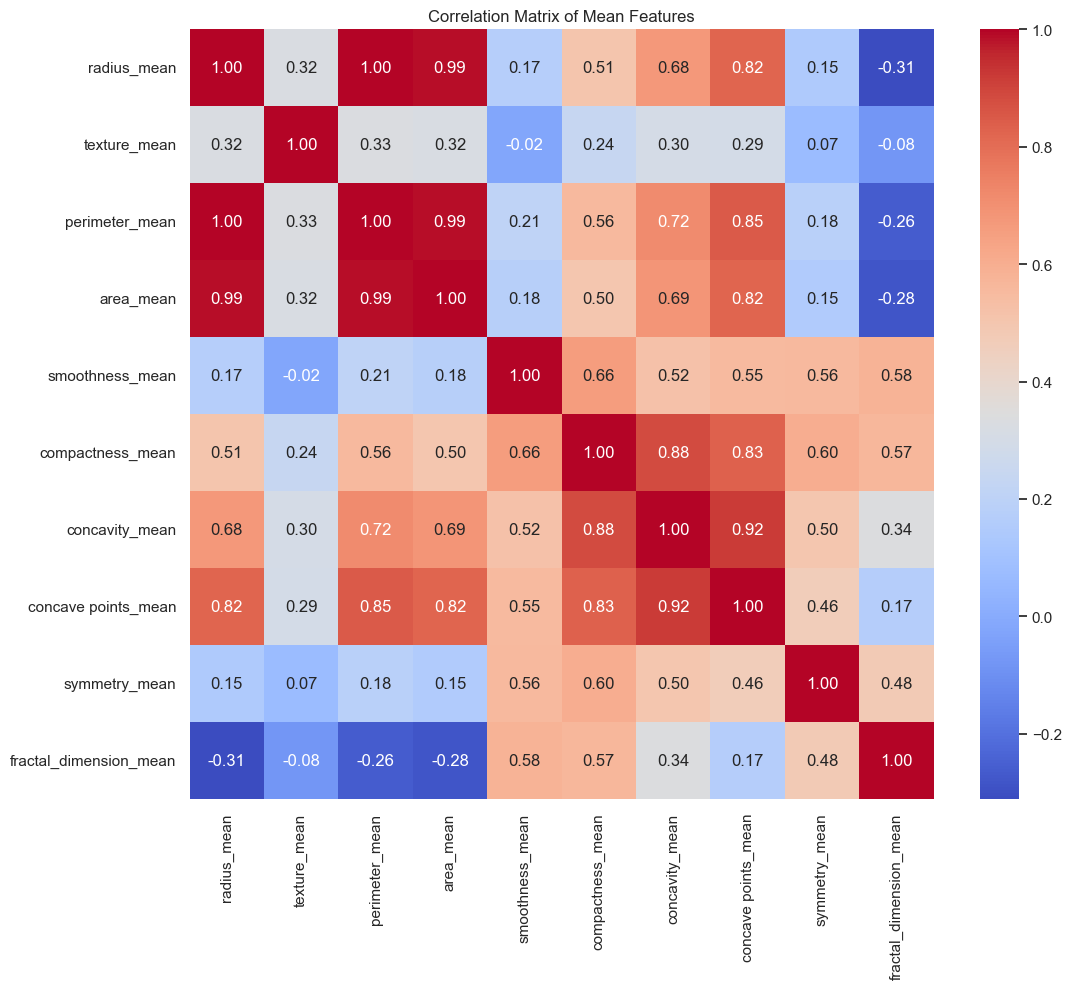

In [21]:
mean_features = [col for col in data.columns if 'mean' in col and data[col].dtype != 'object']
correlation_matrix = data[mean_features].corr()

plt.figure(figsize=(12, 10))
ax = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
ax.set_title('Correlation Matrix of Mean Features')
plt.show()

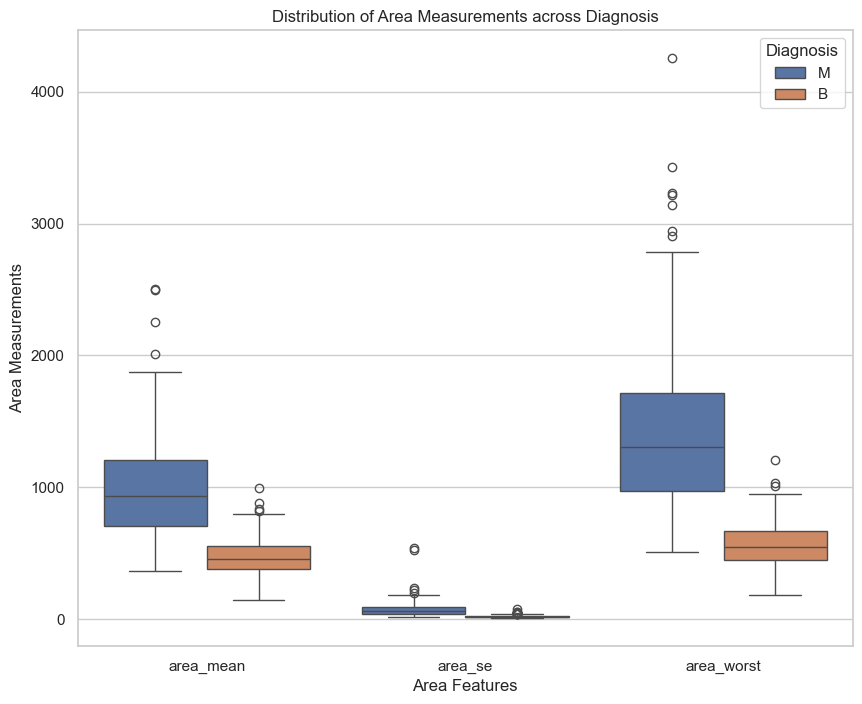

In [22]:
# boxplot for a measurements
area_features = ['area_mean', 'area_se', 'area_worst']
melted_area_data = pd.melt(data, id_vars=['diagnosis'], value_vars=area_features, var_name='Area Features', value_name='Value')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Area Features', y='Value', hue='diagnosis', data=melted_area_data)
ax.set_title('Distribution of Area Measurements across Diagnosis')
ax.set_xlabel('Area Features')
ax.set_ylabel('Area Measurements')
plt.legend(title='Diagnosis')
plt.show()

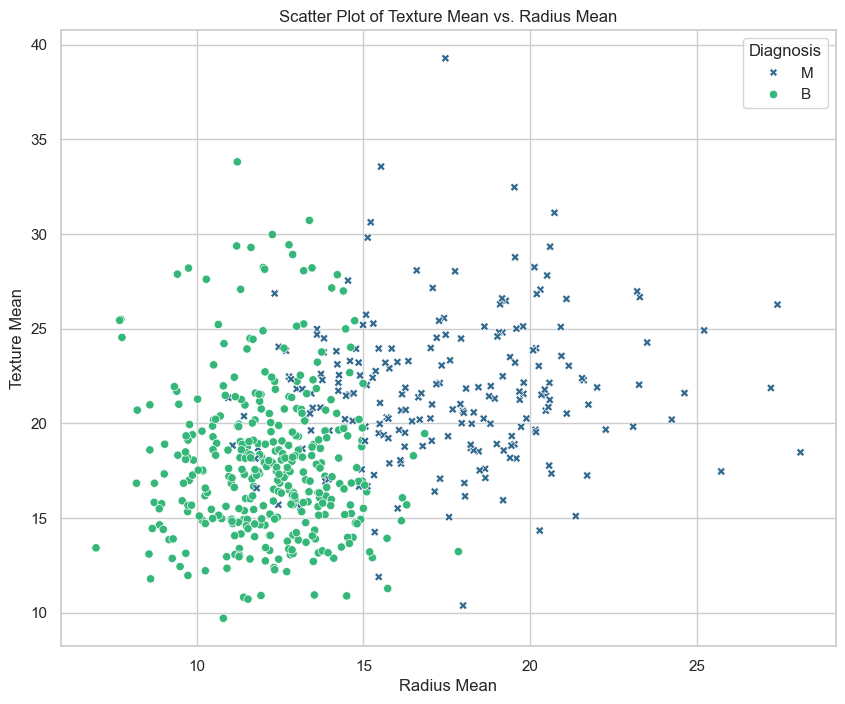

In [23]:
# scatter plot for texture vs. radius
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=data, style='diagnosis', markers={'B':'o', 'M':'X'}, palette='viridis')
ax.set_title('Scatter Plot of Texture Mean vs. Radius Mean')
ax.set_xlabel('Radius Mean')
ax.set_ylabel('Texture Mean')
plt.legend(title='Diagnosis')
plt.show()

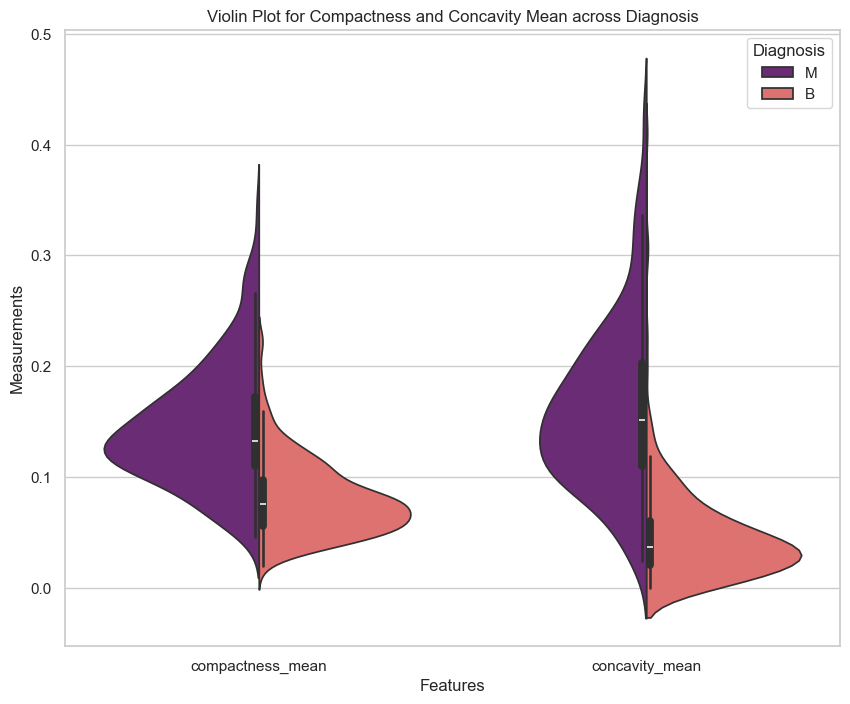

In [24]:
# violin Plot for Compactness and Concavity
compactness_concavity_features = ['compactness_mean', 'concavity_mean']
melted_cc_data = pd.melt(data, id_vars=['diagnosis'], value_vars=compactness_concavity_features, var_name='Features', value_name='Value')

plt.figure(figsize=(10, 8))
ax = sns.violinplot(x='Features', y='Value', hue='diagnosis', data=melted_cc_data, split=True, palette='magma')
ax.set_title('Violin Plot for Compactness and Concavity Mean across Diagnosis')
ax.set_xlabel('Features')
ax.set_ylabel('Measurements')
plt.legend(title='Diagnosis')
plt.show()

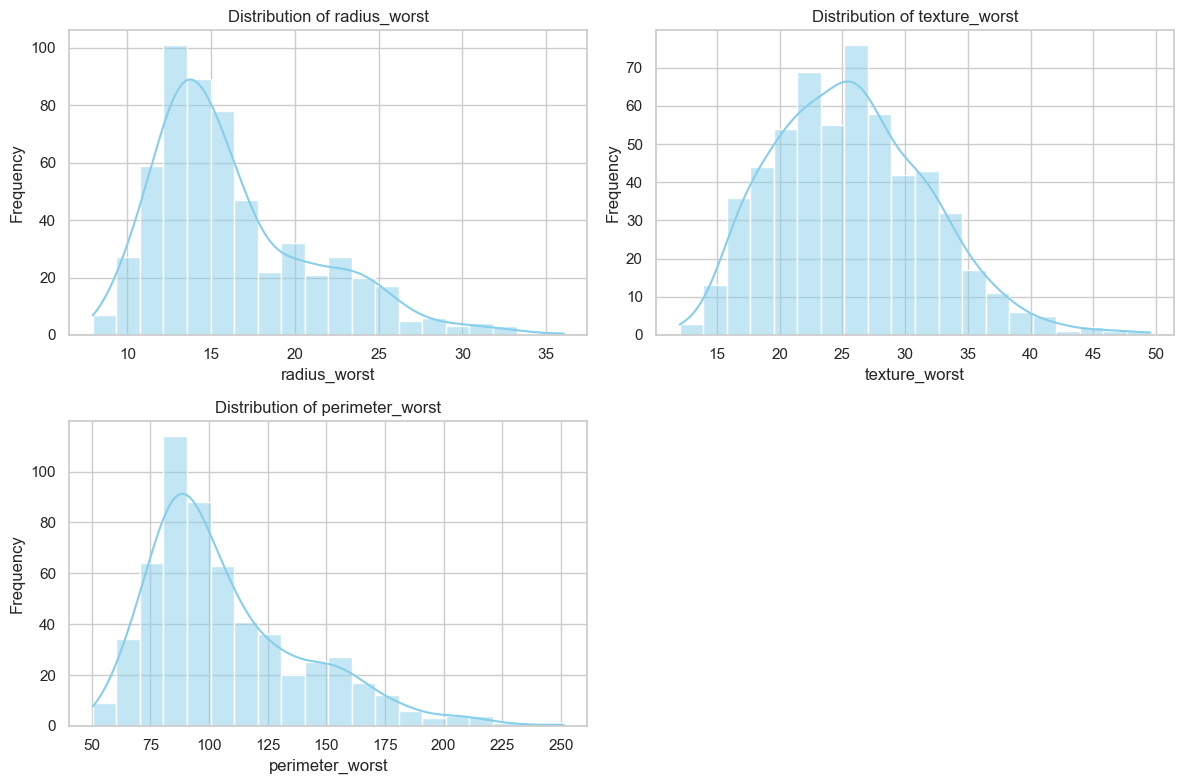

In [25]:
# histograms of Worst Stage Features
worst_features = ['radius_worst', 'texture_worst', 'perimeter_worst']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(worst_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


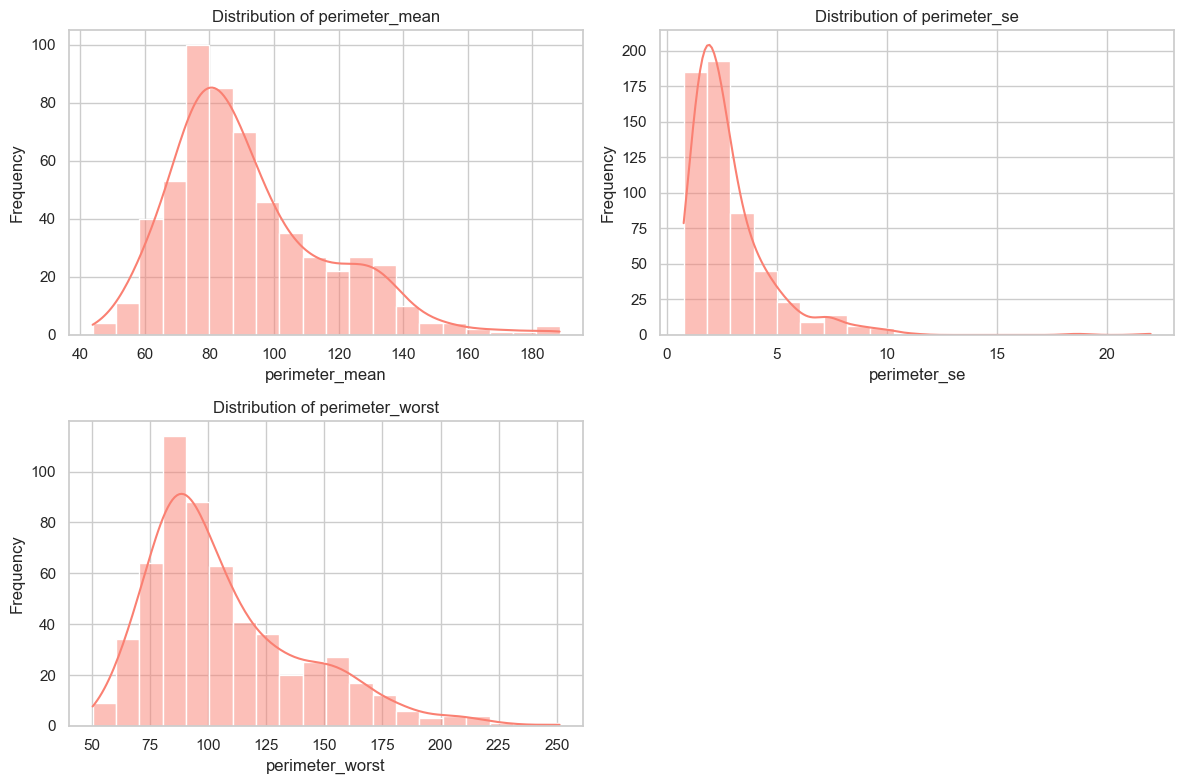

In [26]:
# histogram of perimeter features
perimeter_features = ['perimeter_mean', 'perimeter_se', 'perimeter_worst']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(perimeter_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], bins=20, kde=True, color='salmon')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

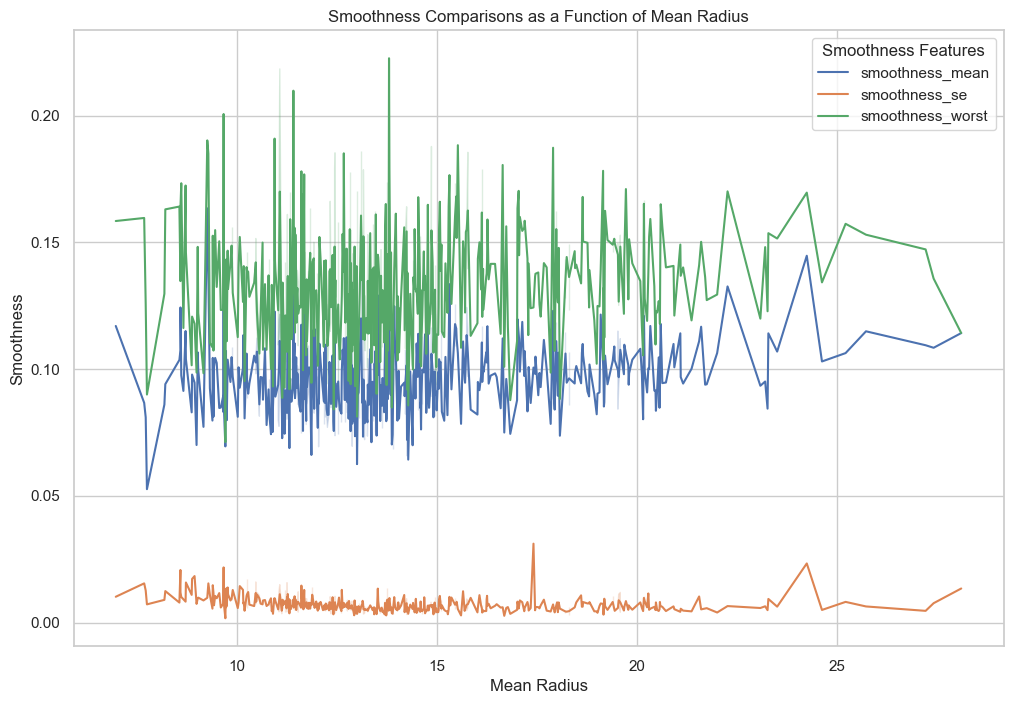

In [27]:
# line plots of smoothness comps
smoothness_features = ['smoothness_mean', 'smoothness_se', 'smoothness_worst']

plt.figure(figsize=(12, 8))
for feature in smoothness_features:
    sns.lineplot(data=data, x='radius_mean', y=feature, label=feature)

plt.title('Smoothness Comparisons as a Function of Mean Radius')
plt.xlabel('Mean Radius')
plt.ylabel('Smoothness')
plt.legend(title='Smoothness Features')
plt.show()
